In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint 
from sklearn.tree import export_graphviz 
from sklearn.externals.six import StringIO  
from IPython.display import Image
import pydot
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.constraints import maxnorm

tempIemisions = pd.read_csv("DataSetFinal.csv", index_col=0)
dummiesCountry=pd.get_dummies(tempIemisions['Country'],drop_first=1)
tempIemisions=pd.concat([tempIemisions,dummiesCountry],axis=1)
tempIemisions=tempIemisions.drop(['Country'], axis=1)

#fem X totes les columnes menys temp i y nomes temp el axis=1 es per indicar
#que es una label de les columnes
X = tempIemisions.drop('AverageTemperature', axis=1)
y = tempIemisions['AverageTemperature']

#dividim el dataSet en test 20% i entrenament 80%
#el random_state es la llavor que s'utilitzarà per randomitzar 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

Using TensorFlow backend.


In [47]:
print(tempIemisions)

      Data            CO2           N2O           CH4  AverageTemperature  \
0     1990   62297.166000   4293.063000  10598.566000              -2.443   
1     1990   63417.203939   4342.948570  10608.935464               2.713   
2     1990   64354.776643   4385.020950  10614.433618               5.391   
3     1990   65120.698769   4419.699865  10615.394522               5.462   
4     1990   65725.784968   4447.405043  10612.152237              12.561   
5     1990   66180.849897   4468.556210  10605.040823              14.199   
6     1990   66496.708208   4483.573093  10594.394342              15.992   
7     1990   66684.174557   4492.875417  10580.546853              16.846   
8     1990   66754.063597   4496.882909  10563.832418              10.564   
9     1990   66717.189983   4496.015296  10544.585098               8.224   
10    1990   66584.368368   4490.692305  10523.138952               2.021   
11    1990   66366.413408   4481.333662  10499.828041              -3.402   

In [2]:
#creem l'algorisme del arbre de decisions i l'entrenem
regressor = DecisionTreeRegressor(max_depth=475,min_samples_leaf=4,min_samples_split=23)
regressor.fit(X_train,y_train)


#fem les prediccions
y_predDT = regressor.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predDT))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predDT))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predDT)))
comparacioDTR=pd.DataFrame({'Actual':y_test, 'Predicted':y_predDT})

Mean Absolute Error: 1.3634677405583553
Mean Squared Error: 3.4190629788478075
Root Mean Squared Error: 1.849070842030615


In [3]:
#creem l'algorisme del SVM i l'entrenem
clf = svm.SVR(kernel='rbf', C = 750, gamma = 'scale', tol = 0.06, epsilon=0.6)
clf.fit(X_train, y_train)
y_predSVM = clf.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predSVM))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predSVM))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predSVM)))

Mean Absolute Error: 4.379826376618222
Mean Squared Error: 36.09824138309669
Root Mean Squared Error: 6.008181204249476


In [4]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(bootstrap = True, max_depth = 172, min_samples_leaf = 3, min_samples_split = 12,
                           n_estimators = 1143, random_state = 28)
rf.fit(X_train, y_train)
y_predRT = rf.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predRT))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predRT))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predRT)))
comparacioRF=pd.DataFrame({'Actual':y_test, 'Predicted':y_predRT})

Mean Absolute Error: 1.2841193979350016
Mean Squared Error: 2.901036478517489
Root Mean Squared Error: 1.7032429299772505


In [27]:
#xarxa neuronal que va malament
model2 = Sequential()
model2.add(Dense(55, input_dim=X_train.shape[1], activation='relu', kernel_initializer='normal'))
model2.add(Dense(31, activation='relu'))
model2.add(Dense(10, activation='relu'))
model2.add(Dense(1, activation='linear'))

model2.compile(loss='mae', optimizer='adam', metrics=['mae'])
# Fit the model
history2 = model2.fit(X_train, y_train, epochs=2400,validation_split = 0.2, batch_size=84 ,verbose=1)

y_predNN2 = model2.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predNN2))

Train on 4768 samples, validate on 1193 samples
Epoch 1/2400
4768/4768 [==============================] - 0s 101us/step - loss: 103.2521 - mean_absolute_error: 103.2521 - val_loss: 16.1238 - val_mean_absolute_error: 16.1238
Epoch 2/2400
4768/4768 [==============================] - 0s 12us/step - loss: 12.4436 - mean_absolute_error: 12.4436 - val_loss: 7.4441 - val_mean_absolute_error: 7.4441
Epoch 3/2400
4768/4768 [==============================] - 0s 12us/step - loss: 11.3936 - mean_absolute_error: 11.3936 - val_loss: 7.5251 - val_mean_absolute_error: 7.5251
Epoch 4/2400
4768/4768 [==============================] - 0s 12us/step - loss: 13.6461 - mean_absolute_error: 13.6461 - val_loss: 14.3358 - val_mean_absolute_error: 14.3358
Epoch 5/2400
4768/4768 [==============================] - 0s 19us/step - loss: 11.5625 - mean_absolute_error: 11.5625 - val_loss: 9.9309 - val_mean_absolute_error: 9.9309
Epoch 6/2400
4768/4768 [==============================] - 0s 10us/step - loss: 13.7594 - m

4768/4768 [==============================] - 0s 9us/step - loss: 8.0650 - mean_absolute_error: 8.0650 - val_loss: 7.2042 - val_mean_absolute_error: 7.2042
Epoch 49/2400
4768/4768 [==============================] - 0s 10us/step - loss: 7.4096 - mean_absolute_error: 7.4096 - val_loss: 7.0125 - val_mean_absolute_error: 7.0125
Epoch 50/2400
4768/4768 [==============================] - 0s 9us/step - loss: 8.2120 - mean_absolute_error: 8.2120 - val_loss: 7.7482 - val_mean_absolute_error: 7.7482
Epoch 51/2400
4768/4768 [==============================] - 0s 9us/step - loss: 8.0633 - mean_absolute_error: 8.0633 - val_loss: 7.0601 - val_mean_absolute_error: 7.0601
Epoch 52/2400
4768/4768 [==============================] - 0s 9us/step - loss: 8.9567 - mean_absolute_error: 8.9567 - val_loss: 7.8229 - val_mean_absolute_error: 7.8229
Epoch 53/2400
4768/4768 [==============================] - 0s 9us/step - loss: 8.9734 - mean_absolute_error: 8.9734 - val_loss: 6.9862 - val_mean_absolute_error: 6.9862

4768/4768 [==============================] - 0s 10us/step - loss: 7.6169 - mean_absolute_error: 7.6169 - val_loss: 8.0290 - val_mean_absolute_error: 8.0290
Epoch 97/2400
4768/4768 [==============================] - 0s 11us/step - loss: 7.2976 - mean_absolute_error: 7.2976 - val_loss: 7.5514 - val_mean_absolute_error: 7.5514
Epoch 98/2400
4768/4768 [==============================] - 0s 12us/step - loss: 7.7401 - mean_absolute_error: 7.7401 - val_loss: 7.9425 - val_mean_absolute_error: 7.9425
Epoch 99/2400
4768/4768 [==============================] - 0s 11us/step - loss: 7.3750 - mean_absolute_error: 7.3750 - val_loss: 6.9244 - val_mean_absolute_error: 6.9244
Epoch 100/2400
4768/4768 [==============================] - 0s 11us/step - loss: 7.2702 - mean_absolute_error: 7.2702 - val_loss: 6.8305 - val_mean_absolute_error: 6.8305
Epoch 101/2400
4768/4768 [==============================] - 0s 9us/step - loss: 8.2018 - mean_absolute_error: 8.2018 - val_loss: 7.8501 - val_mean_absolute_error: 

4768/4768 [==============================] - 0s 10us/step - loss: 7.6285 - mean_absolute_error: 7.6285 - val_loss: 6.9203 - val_mean_absolute_error: 6.9203
Epoch 145/2400
4768/4768 [==============================] - 0s 10us/step - loss: 7.0949 - mean_absolute_error: 7.0949 - val_loss: 7.0685 - val_mean_absolute_error: 7.0685
Epoch 146/2400
4768/4768 [==============================] - 0s 10us/step - loss: 7.1570 - mean_absolute_error: 7.1570 - val_loss: 6.9711 - val_mean_absolute_error: 6.9711
Epoch 147/2400
4768/4768 [==============================] - 0s 10us/step - loss: 7.2691 - mean_absolute_error: 7.2691 - val_loss: 7.3503 - val_mean_absolute_error: 7.3503
Epoch 148/2400
4768/4768 [==============================] - 0s 10us/step - loss: 7.2756 - mean_absolute_error: 7.2756 - val_loss: 6.8283 - val_mean_absolute_error: 6.8283
Epoch 149/2400
4768/4768 [==============================] - 0s 10us/step - loss: 7.1011 - mean_absolute_error: 7.1011 - val_loss: 6.7658 - val_mean_absolute_err

4768/4768 [==============================] - 0s 10us/step - loss: 6.5645 - mean_absolute_error: 6.5645 - val_loss: 6.8012 - val_mean_absolute_error: 6.8012
Epoch 193/2400
4768/4768 [==============================] - 0s 9us/step - loss: 6.6008 - mean_absolute_error: 6.6008 - val_loss: 6.4686 - val_mean_absolute_error: 6.4686
Epoch 194/2400
4768/4768 [==============================] - 0s 11us/step - loss: 6.5222 - mean_absolute_error: 6.5222 - val_loss: 6.5620 - val_mean_absolute_error: 6.5620
Epoch 195/2400
4768/4768 [==============================] - 0s 10us/step - loss: 6.5595 - mean_absolute_error: 6.5595 - val_loss: 6.9264 - val_mean_absolute_error: 6.9264
Epoch 196/2400
4768/4768 [==============================] - 0s 10us/step - loss: 6.6232 - mean_absolute_error: 6.6232 - val_loss: 6.4575 - val_mean_absolute_error: 6.4575
Epoch 197/2400
4768/4768 [==============================] - 0s 9us/step - loss: 6.5589 - mean_absolute_error: 6.5589 - val_loss: 6.5026 - val_mean_absolute_error

4768/4768 [==============================] - 0s 10us/step - loss: 6.3459 - mean_absolute_error: 6.3459 - val_loss: 6.3295 - val_mean_absolute_error: 6.3295
Epoch 241/2400
4768/4768 [==============================] - 0s 10us/step - loss: 6.5126 - mean_absolute_error: 6.5126 - val_loss: 7.0780 - val_mean_absolute_error: 7.0780
Epoch 242/2400
4768/4768 [==============================] - 0s 11us/step - loss: 6.4233 - mean_absolute_error: 6.4233 - val_loss: 6.4319 - val_mean_absolute_error: 6.4319
Epoch 243/2400
4768/4768 [==============================] - 0s 12us/step - loss: 6.4088 - mean_absolute_error: 6.4088 - val_loss: 6.3922 - val_mean_absolute_error: 6.3922
Epoch 244/2400
4768/4768 [==============================] - 0s 12us/step - loss: 6.3742 - mean_absolute_error: 6.3742 - val_loss: 6.3701 - val_mean_absolute_error: 6.3701
Epoch 245/2400
4768/4768 [==============================] - 0s 10us/step - loss: 6.6044 - mean_absolute_error: 6.6044 - val_loss: 6.5955 - val_mean_absolute_err

Epoch 288/2400
4768/4768 [==============================] - 0s 9us/step - loss: 6.0088 - mean_absolute_error: 6.0088 - val_loss: 5.7927 - val_mean_absolute_error: 5.7927
Epoch 289/2400
4768/4768 [==============================] - 0s 9us/step - loss: 5.6997 - mean_absolute_error: 5.6997 - val_loss: 5.8906 - val_mean_absolute_error: 5.8906
Epoch 290/2400
4768/4768 [==============================] - 0s 9us/step - loss: 5.8906 - mean_absolute_error: 5.8906 - val_loss: 5.9261 - val_mean_absolute_error: 5.9261
Epoch 291/2400
4768/4768 [==============================] - 0s 9us/step - loss: 5.6010 - mean_absolute_error: 5.6010 - val_loss: 5.8061 - val_mean_absolute_error: 5.8061
Epoch 292/2400
4768/4768 [==============================] - 0s 8us/step - loss: 5.7685 - mean_absolute_error: 5.7685 - val_loss: 5.6587 - val_mean_absolute_error: 5.6587
Epoch 293/2400
4768/4768 [==============================] - 0s 10us/step - loss: 5.5347 - mean_absolute_error: 5.5347 - val_loss: 6.0635 - val_mean_ab

4768/4768 [==============================] - 0s 10us/step - loss: 5.0889 - mean_absolute_error: 5.0889 - val_loss: 5.4343 - val_mean_absolute_error: 5.4343
Epoch 337/2400
4768/4768 [==============================] - 0s 10us/step - loss: 4.8489 - mean_absolute_error: 4.8489 - val_loss: 5.3127 - val_mean_absolute_error: 5.3127
Epoch 338/2400
4768/4768 [==============================] - 0s 10us/step - loss: 5.0801 - mean_absolute_error: 5.0801 - val_loss: 4.9288 - val_mean_absolute_error: 4.9288
Epoch 339/2400
4768/4768 [==============================] - 0s 10us/step - loss: 5.0734 - mean_absolute_error: 5.0734 - val_loss: 5.2059 - val_mean_absolute_error: 5.2059
Epoch 340/2400
4768/4768 [==============================] - 0s 10us/step - loss: 4.8859 - mean_absolute_error: 4.8859 - val_loss: 4.7943 - val_mean_absolute_error: 4.7943
Epoch 341/2400
4768/4768 [==============================] - 0s 10us/step - loss: 5.0920 - mean_absolute_error: 5.0920 - val_loss: 5.3728 - val_mean_absolute_err

4768/4768 [==============================] - 0s 9us/step - loss: 4.5579 - mean_absolute_error: 4.5579 - val_loss: 6.5196 - val_mean_absolute_error: 6.5196
Epoch 385/2400
4768/4768 [==============================] - 0s 9us/step - loss: 4.7403 - mean_absolute_error: 4.7403 - val_loss: 4.4421 - val_mean_absolute_error: 4.4421
Epoch 386/2400
4768/4768 [==============================] - 0s 9us/step - loss: 4.4926 - mean_absolute_error: 4.4926 - val_loss: 4.8026 - val_mean_absolute_error: 4.8026
Epoch 387/2400
4768/4768 [==============================] - 0s 9us/step - loss: 4.3306 - mean_absolute_error: 4.3306 - val_loss: 4.3333 - val_mean_absolute_error: 4.3333
Epoch 388/2400
4768/4768 [==============================] - 0s 9us/step - loss: 4.5247 - mean_absolute_error: 4.5247 - val_loss: 4.4372 - val_mean_absolute_error: 4.4372
Epoch 389/2400
4768/4768 [==============================] - 0s 9us/step - loss: 4.3322 - mean_absolute_error: 4.3322 - val_loss: 4.9825 - val_mean_absolute_error: 4.

4768/4768 [==============================] - 0s 9us/step - loss: 4.5320 - mean_absolute_error: 4.5320 - val_loss: 4.2971 - val_mean_absolute_error: 4.2971
Epoch 433/2400
4768/4768 [==============================] - 0s 9us/step - loss: 4.3735 - mean_absolute_error: 4.3735 - val_loss: 4.3711 - val_mean_absolute_error: 4.3711
Epoch 434/2400
4768/4768 [==============================] - 0s 9us/step - loss: 4.2724 - mean_absolute_error: 4.2724 - val_loss: 4.0764 - val_mean_absolute_error: 4.0764
Epoch 435/2400
4768/4768 [==============================] - 0s 9us/step - loss: 4.2579 - mean_absolute_error: 4.2579 - val_loss: 5.1562 - val_mean_absolute_error: 5.1562
Epoch 436/2400
4768/4768 [==============================] - 0s 9us/step - loss: 4.4620 - mean_absolute_error: 4.4620 - val_loss: 5.0494 - val_mean_absolute_error: 5.0494
Epoch 437/2400
4768/4768 [==============================] - 0s 9us/step - loss: 4.4245 - mean_absolute_error: 4.4245 - val_loss: 4.9877 - val_mean_absolute_error: 4.

4768/4768 [==============================] - 0s 10us/step - loss: 4.7493 - mean_absolute_error: 4.7493 - val_loss: 4.2614 - val_mean_absolute_error: 4.2614
Epoch 481/2400
4768/4768 [==============================] - 0s 9us/step - loss: 4.1026 - mean_absolute_error: 4.1026 - val_loss: 4.1763 - val_mean_absolute_error: 4.1763
Epoch 482/2400
4768/4768 [==============================] - 0s 9us/step - loss: 4.3980 - mean_absolute_error: 4.3980 - val_loss: 3.8859 - val_mean_absolute_error: 3.8859
Epoch 483/2400
4768/4768 [==============================] - 0s 10us/step - loss: 4.1048 - mean_absolute_error: 4.1048 - val_loss: 5.9759 - val_mean_absolute_error: 5.9759
Epoch 484/2400
4768/4768 [==============================] - 0s 9us/step - loss: 4.3294 - mean_absolute_error: 4.3294 - val_loss: 4.5705 - val_mean_absolute_error: 4.5705
Epoch 485/2400
4768/4768 [==============================] - 0s 9us/step - loss: 4.2660 - mean_absolute_error: 4.2660 - val_loss: 5.8584 - val_mean_absolute_error: 

4768/4768 [==============================] - 0s 10us/step - loss: 4.1300 - mean_absolute_error: 4.1300 - val_loss: 4.7610 - val_mean_absolute_error: 4.7610
Epoch 529/2400
4768/4768 [==============================] - 0s 10us/step - loss: 4.3503 - mean_absolute_error: 4.3503 - val_loss: 4.4122 - val_mean_absolute_error: 4.4122
Epoch 530/2400
4768/4768 [==============================] - 0s 9us/step - loss: 4.2380 - mean_absolute_error: 4.2380 - val_loss: 4.1224 - val_mean_absolute_error: 4.1224
Epoch 531/2400
4768/4768 [==============================] - 0s 10us/step - loss: 3.9371 - mean_absolute_error: 3.9371 - val_loss: 4.0059 - val_mean_absolute_error: 4.0059
Epoch 532/2400
4768/4768 [==============================] - 0s 9us/step - loss: 4.7546 - mean_absolute_error: 4.7546 - val_loss: 3.9373 - val_mean_absolute_error: 3.9373
Epoch 533/2400
4768/4768 [==============================] - 0s 9us/step - loss: 4.4119 - mean_absolute_error: 4.4119 - val_loss: 4.5478 - val_mean_absolute_error:

4768/4768 [==============================] - 0s 9us/step - loss: 3.8276 - mean_absolute_error: 3.8276 - val_loss: 3.6808 - val_mean_absolute_error: 3.6808
Epoch 577/2400
4768/4768 [==============================] - 0s 8us/step - loss: 3.9803 - mean_absolute_error: 3.9803 - val_loss: 3.8511 - val_mean_absolute_error: 3.8511
Epoch 578/2400
4768/4768 [==============================] - 0s 10us/step - loss: 4.2298 - mean_absolute_error: 4.2298 - val_loss: 4.0418 - val_mean_absolute_error: 4.0418
Epoch 579/2400
4768/4768 [==============================] - 0s 10us/step - loss: 4.1610 - mean_absolute_error: 4.1610 - val_loss: 4.7010 - val_mean_absolute_error: 4.7010
Epoch 580/2400
4768/4768 [==============================] - 0s 10us/step - loss: 3.9108 - mean_absolute_error: 3.9108 - val_loss: 3.8829 - val_mean_absolute_error: 3.8829
Epoch 581/2400
4768/4768 [==============================] - 0s 9us/step - loss: 4.2769 - mean_absolute_error: 4.2769 - val_loss: 5.1733 - val_mean_absolute_error:

4768/4768 [==============================] - 0s 9us/step - loss: 3.7870 - mean_absolute_error: 3.7870 - val_loss: 4.8578 - val_mean_absolute_error: 4.8578
Epoch 625/2400
4768/4768 [==============================] - 0s 9us/step - loss: 4.2594 - mean_absolute_error: 4.2594 - val_loss: 3.9039 - val_mean_absolute_error: 3.9039
Epoch 626/2400
4768/4768 [==============================] - 0s 9us/step - loss: 3.9169 - mean_absolute_error: 3.9169 - val_loss: 4.3017 - val_mean_absolute_error: 4.3017
Epoch 627/2400
4768/4768 [==============================] - 0s 9us/step - loss: 4.2782 - mean_absolute_error: 4.2782 - val_loss: 5.1487 - val_mean_absolute_error: 5.1487
Epoch 628/2400
4768/4768 [==============================] - 0s 10us/step - loss: 4.1797 - mean_absolute_error: 4.1797 - val_loss: 4.8796 - val_mean_absolute_error: 4.8796
Epoch 629/2400
4768/4768 [==============================] - 0s 10us/step - loss: 4.5422 - mean_absolute_error: 4.5422 - val_loss: 4.8280 - val_mean_absolute_error: 

4768/4768 [==============================] - 0s 12us/step - loss: 3.9441 - mean_absolute_error: 3.9441 - val_loss: 4.0723 - val_mean_absolute_error: 4.0723
Epoch 673/2400
4768/4768 [==============================] - 0s 12us/step - loss: 3.9093 - mean_absolute_error: 3.9093 - val_loss: 4.2694 - val_mean_absolute_error: 4.2694
Epoch 674/2400
4768/4768 [==============================] - 0s 10us/step - loss: 3.9294 - mean_absolute_error: 3.9294 - val_loss: 4.3496 - val_mean_absolute_error: 4.3496
Epoch 675/2400
4768/4768 [==============================] - 0s 10us/step - loss: 3.9755 - mean_absolute_error: 3.9755 - val_loss: 4.6625 - val_mean_absolute_error: 4.6625
Epoch 676/2400
4768/4768 [==============================] - 0s 10us/step - loss: 4.4653 - mean_absolute_error: 4.4653 - val_loss: 3.9203 - val_mean_absolute_error: 3.9203
Epoch 677/2400
4768/4768 [==============================] - 0s 9us/step - loss: 3.8595 - mean_absolute_error: 3.8595 - val_loss: 3.8419 - val_mean_absolute_erro

4768/4768 [==============================] - 0s 9us/step - loss: 3.7416 - mean_absolute_error: 3.7416 - val_loss: 3.9892 - val_mean_absolute_error: 3.9892
Epoch 721/2400
4768/4768 [==============================] - 0s 10us/step - loss: 3.9113 - mean_absolute_error: 3.9113 - val_loss: 3.7423 - val_mean_absolute_error: 3.7423
Epoch 722/2400
4768/4768 [==============================] - 0s 9us/step - loss: 3.7793 - mean_absolute_error: 3.7793 - val_loss: 5.3422 - val_mean_absolute_error: 5.3422
Epoch 723/2400
4768/4768 [==============================] - 0s 9us/step - loss: 3.7589 - mean_absolute_error: 3.7589 - val_loss: 3.8154 - val_mean_absolute_error: 3.8154
Epoch 724/2400
4768/4768 [==============================] - 0s 9us/step - loss: 3.7297 - mean_absolute_error: 3.7297 - val_loss: 4.0528 - val_mean_absolute_error: 4.0528
Epoch 725/2400
4768/4768 [==============================] - 0s 10us/step - loss: 3.9268 - mean_absolute_error: 3.9268 - val_loss: 3.5670 - val_mean_absolute_error: 

4768/4768 [==============================] - 0s 10us/step - loss: 3.6828 - mean_absolute_error: 3.6828 - val_loss: 3.9920 - val_mean_absolute_error: 3.9920
Epoch 769/2400
4768/4768 [==============================] - 0s 9us/step - loss: 3.7962 - mean_absolute_error: 3.7962 - val_loss: 3.8350 - val_mean_absolute_error: 3.8350
Epoch 770/2400
4768/4768 [==============================] - 0s 10us/step - loss: 4.0364 - mean_absolute_error: 4.0364 - val_loss: 4.6393 - val_mean_absolute_error: 4.6393
Epoch 771/2400
4768/4768 [==============================] - 0s 9us/step - loss: 4.2089 - mean_absolute_error: 4.2089 - val_loss: 5.1980 - val_mean_absolute_error: 5.1980
Epoch 772/2400
4768/4768 [==============================] - 0s 9us/step - loss: 4.2184 - mean_absolute_error: 4.2184 - val_loss: 3.6813 - val_mean_absolute_error: 3.6813
Epoch 773/2400
4768/4768 [==============================] - 0s 8us/step - loss: 3.7708 - mean_absolute_error: 3.7708 - val_loss: 3.7629 - val_mean_absolute_error: 

4768/4768 [==============================] - 0s 10us/step - loss: 3.4689 - mean_absolute_error: 3.4689 - val_loss: 4.8116 - val_mean_absolute_error: 4.8116
Epoch 817/2400
4768/4768 [==============================] - 0s 10us/step - loss: 4.1837 - mean_absolute_error: 4.1837 - val_loss: 5.4670 - val_mean_absolute_error: 5.4670
Epoch 818/2400
4768/4768 [==============================] - 0s 10us/step - loss: 4.1369 - mean_absolute_error: 4.1369 - val_loss: 3.9140 - val_mean_absolute_error: 3.9140
Epoch 819/2400
4768/4768 [==============================] - 0s 9us/step - loss: 3.6868 - mean_absolute_error: 3.6868 - val_loss: 3.8755 - val_mean_absolute_error: 3.8755
Epoch 820/2400
4768/4768 [==============================] - 0s 10us/step - loss: 3.6462 - mean_absolute_error: 3.6462 - val_loss: 4.2192 - val_mean_absolute_error: 4.2192
Epoch 821/2400
4768/4768 [==============================] - 0s 9us/step - loss: 3.6047 - mean_absolute_error: 3.6047 - val_loss: 3.4031 - val_mean_absolute_error

Epoch 864/2400
4768/4768 [==============================] - 0s 10us/step - loss: 4.0359 - mean_absolute_error: 4.0359 - val_loss: 3.8896 - val_mean_absolute_error: 3.8896
Epoch 865/2400
4768/4768 [==============================] - 0s 10us/step - loss: 3.7083 - mean_absolute_error: 3.7083 - val_loss: 3.7339 - val_mean_absolute_error: 3.7339
Epoch 866/2400
4768/4768 [==============================] - 0s 9us/step - loss: 3.8751 - mean_absolute_error: 3.8751 - val_loss: 3.9415 - val_mean_absolute_error: 3.9415
Epoch 867/2400
4768/4768 [==============================] - 0s 9us/step - loss: 3.6577 - mean_absolute_error: 3.6577 - val_loss: 3.9860 - val_mean_absolute_error: 3.9860
Epoch 868/2400
4768/4768 [==============================] - 0s 10us/step - loss: 3.3553 - mean_absolute_error: 3.3553 - val_loss: 4.0080 - val_mean_absolute_error: 4.0080
Epoch 869/2400
4768/4768 [==============================] - 0s 10us/step - loss: 4.1572 - mean_absolute_error: 4.1572 - val_loss: 3.5207 - val_mean

4768/4768 [==============================] - 0s 10us/step - loss: 3.4398 - mean_absolute_error: 3.4398 - val_loss: 4.2192 - val_mean_absolute_error: 4.2192
Epoch 913/2400
4768/4768 [==============================] - 0s 9us/step - loss: 3.4278 - mean_absolute_error: 3.4278 - val_loss: 3.4457 - val_mean_absolute_error: 3.4457
Epoch 914/2400
4768/4768 [==============================] - 0s 9us/step - loss: 3.5664 - mean_absolute_error: 3.5664 - val_loss: 4.1953 - val_mean_absolute_error: 4.1953
Epoch 915/2400
4768/4768 [==============================] - 0s 9us/step - loss: 3.6832 - mean_absolute_error: 3.6832 - val_loss: 3.6256 - val_mean_absolute_error: 3.6256
Epoch 916/2400
4768/4768 [==============================] - 0s 9us/step - loss: 3.5414 - mean_absolute_error: 3.5414 - val_loss: 4.4208 - val_mean_absolute_error: 4.4208
Epoch 917/2400
4768/4768 [==============================] - 0s 9us/step - loss: 3.3773 - mean_absolute_error: 3.3773 - val_loss: 3.6644 - val_mean_absolute_error: 3

4768/4768 [==============================] - 0s 10us/step - loss: 4.0044 - mean_absolute_error: 4.0044 - val_loss: 3.5086 - val_mean_absolute_error: 3.5086
Epoch 961/2400
4768/4768 [==============================] - 0s 10us/step - loss: 3.3110 - mean_absolute_error: 3.3110 - val_loss: 3.4154 - val_mean_absolute_error: 3.4154
Epoch 962/2400
4768/4768 [==============================] - 0s 9us/step - loss: 3.7421 - mean_absolute_error: 3.7421 - val_loss: 4.4431 - val_mean_absolute_error: 4.4431
Epoch 963/2400
4768/4768 [==============================] - 0s 9us/step - loss: 3.5372 - mean_absolute_error: 3.5372 - val_loss: 4.3310 - val_mean_absolute_error: 4.3310
Epoch 964/2400
4768/4768 [==============================] - 0s 9us/step - loss: 3.4645 - mean_absolute_error: 3.4645 - val_loss: 5.1771 - val_mean_absolute_error: 5.1771
Epoch 965/2400
4768/4768 [==============================] - 0s 9us/step - loss: 3.7040 - mean_absolute_error: 3.7040 - val_loss: 3.9434 - val_mean_absolute_error: 

4768/4768 [==============================] - 0s 10us/step - loss: 3.3657 - mean_absolute_error: 3.3657 - val_loss: 3.1545 - val_mean_absolute_error: 3.1545
Epoch 1009/2400
4768/4768 [==============================] - 0s 9us/step - loss: 3.7664 - mean_absolute_error: 3.7664 - val_loss: 4.0373 - val_mean_absolute_error: 4.0373
Epoch 1010/2400
4768/4768 [==============================] - 0s 10us/step - loss: 3.1981 - mean_absolute_error: 3.1981 - val_loss: 3.7826 - val_mean_absolute_error: 3.7826
Epoch 1011/2400
4768/4768 [==============================] - 0s 12us/step - loss: 3.5027 - mean_absolute_error: 3.5027 - val_loss: 3.6459 - val_mean_absolute_error: 3.6459
Epoch 1012/2400
4768/4768 [==============================] - 0s 12us/step - loss: 3.5801 - mean_absolute_error: 3.5801 - val_loss: 4.0848 - val_mean_absolute_error: 4.0848
Epoch 1013/2400
4768/4768 [==============================] - 0s 11us/step - loss: 4.2303 - mean_absolute_error: 4.2303 - val_loss: 4.4265 - val_mean_absolute

Epoch 1056/2400
4768/4768 [==============================] - 0s 8us/step - loss: 3.3775 - mean_absolute_error: 3.3775 - val_loss: 5.7759 - val_mean_absolute_error: 5.7759
Epoch 1057/2400
4768/4768 [==============================] - 0s 11us/step - loss: 3.7140 - mean_absolute_error: 3.7140 - val_loss: 3.1634 - val_mean_absolute_error: 3.1634
Epoch 1058/2400
4768/4768 [==============================] - 0s 9us/step - loss: 3.2338 - mean_absolute_error: 3.2338 - val_loss: 3.1640 - val_mean_absolute_error: 3.1640
Epoch 1059/2400
4768/4768 [==============================] - 0s 9us/step - loss: 3.5717 - mean_absolute_error: 3.5717 - val_loss: 3.8713 - val_mean_absolute_error: 3.8713
Epoch 1060/2400
4768/4768 [==============================] - 0s 9us/step - loss: 3.3102 - mean_absolute_error: 3.3102 - val_loss: 3.0046 - val_mean_absolute_error: 3.0046
Epoch 1061/2400
4768/4768 [==============================] - 0s 9us/step - loss: 3.3988 - mean_absolute_error: 3.3988 - val_loss: 3.1894 - val_m

Epoch 1104/2400
4768/4768 [==============================] - 0s 9us/step - loss: 3.1368 - mean_absolute_error: 3.1368 - val_loss: 3.0756 - val_mean_absolute_error: 3.0756
Epoch 1105/2400
4768/4768 [==============================] - 0s 9us/step - loss: 3.5818 - mean_absolute_error: 3.5818 - val_loss: 3.1495 - val_mean_absolute_error: 3.1495
Epoch 1106/2400
4768/4768 [==============================] - 0s 9us/step - loss: 3.3729 - mean_absolute_error: 3.3729 - val_loss: 3.0926 - val_mean_absolute_error: 3.0926
Epoch 1107/2400
4768/4768 [==============================] - 0s 10us/step - loss: 3.0945 - mean_absolute_error: 3.0945 - val_loss: 3.2723 - val_mean_absolute_error: 3.2723
Epoch 1108/2400
4768/4768 [==============================] - 0s 9us/step - loss: 3.1374 - mean_absolute_error: 3.1374 - val_loss: 3.0584 - val_mean_absolute_error: 3.0584
Epoch 1109/2400
4768/4768 [==============================] - 0s 9us/step - loss: 3.6149 - mean_absolute_error: 3.6149 - val_loss: 3.8934 - val_m

Epoch 1152/2400
4768/4768 [==============================] - 0s 9us/step - loss: 2.9208 - mean_absolute_error: 2.9208 - val_loss: 3.1148 - val_mean_absolute_error: 3.1148
Epoch 1153/2400
4768/4768 [==============================] - 0s 9us/step - loss: 3.5605 - mean_absolute_error: 3.5605 - val_loss: 3.6211 - val_mean_absolute_error: 3.6211
Epoch 1154/2400
4768/4768 [==============================] - 0s 8us/step - loss: 3.4682 - mean_absolute_error: 3.4682 - val_loss: 3.7805 - val_mean_absolute_error: 3.7805
Epoch 1155/2400
4768/4768 [==============================] - 0s 10us/step - loss: 3.4051 - mean_absolute_error: 3.4051 - val_loss: 3.6095 - val_mean_absolute_error: 3.6095
Epoch 1156/2400
4768/4768 [==============================] - 0s 9us/step - loss: 3.4979 - mean_absolute_error: 3.4979 - val_loss: 3.1989 - val_mean_absolute_error: 3.1989
Epoch 1157/2400
4768/4768 [==============================] - 0s 9us/step - loss: 3.3503 - mean_absolute_error: 3.3503 - val_loss: 3.4171 - val_m

Epoch 1200/2400
4768/4768 [==============================] - 0s 10us/step - loss: 3.3693 - mean_absolute_error: 3.3693 - val_loss: 5.3555 - val_mean_absolute_error: 5.3555
Epoch 1201/2400
4768/4768 [==============================] - 0s 9us/step - loss: 3.8237 - mean_absolute_error: 3.8237 - val_loss: 3.9084 - val_mean_absolute_error: 3.9084
Epoch 1202/2400
4768/4768 [==============================] - 0s 9us/step - loss: 3.2783 - mean_absolute_error: 3.2783 - val_loss: 3.0314 - val_mean_absolute_error: 3.0314
Epoch 1203/2400
4768/4768 [==============================] - 0s 9us/step - loss: 3.1498 - mean_absolute_error: 3.1498 - val_loss: 3.1944 - val_mean_absolute_error: 3.1944
Epoch 1204/2400
4768/4768 [==============================] - 0s 10us/step - loss: 3.3758 - mean_absolute_error: 3.3758 - val_loss: 3.1408 - val_mean_absolute_error: 3.1408
Epoch 1205/2400
4768/4768 [==============================] - 0s 9us/step - loss: 3.1496 - mean_absolute_error: 3.1496 - val_loss: 3.8145 - val_

4768/4768 [==============================] - 0s 10us/step - loss: 3.2874 - mean_absolute_error: 3.2874 - val_loss: 5.5328 - val_mean_absolute_error: 5.5328
Epoch 1248/2400
4768/4768 [==============================] - 0s 11us/step - loss: 3.7864 - mean_absolute_error: 3.7864 - val_loss: 2.8176 - val_mean_absolute_error: 2.8176
Epoch 1249/2400
4768/4768 [==============================] - 0s 10us/step - loss: 3.3141 - mean_absolute_error: 3.3141 - val_loss: 3.0977 - val_mean_absolute_error: 3.0977
Epoch 1250/2400
4768/4768 [==============================] - 0s 10us/step - loss: 3.1633 - mean_absolute_error: 3.1633 - val_loss: 3.7221 - val_mean_absolute_error: 3.7221
Epoch 1251/2400
4768/4768 [==============================] - 0s 11us/step - loss: 3.2600 - mean_absolute_error: 3.2600 - val_loss: 3.3570 - val_mean_absolute_error: 3.3570
Epoch 1252/2400
4768/4768 [==============================] - 0s 10us/step - loss: 3.3344 - mean_absolute_error: 3.3344 - val_loss: 4.8069 - val_mean_absolut

Epoch 1295/2400
4768/4768 [==============================] - 0s 11us/step - loss: 3.5769 - mean_absolute_error: 3.5769 - val_loss: 3.3996 - val_mean_absolute_error: 3.3996
Epoch 1296/2400
4768/4768 [==============================] - 0s 10us/step - loss: 3.1394 - mean_absolute_error: 3.1394 - val_loss: 6.7006 - val_mean_absolute_error: 6.7006
Epoch 1297/2400
4768/4768 [==============================] - 0s 10us/step - loss: 3.5069 - mean_absolute_error: 3.5069 - val_loss: 2.7922 - val_mean_absolute_error: 2.7922
Epoch 1298/2400
4768/4768 [==============================] - 0s 10us/step - loss: 3.3742 - mean_absolute_error: 3.3742 - val_loss: 2.8063 - val_mean_absolute_error: 2.8063
Epoch 1299/2400
4768/4768 [==============================] - 0s 12us/step - loss: 2.7898 - mean_absolute_error: 2.7898 - val_loss: 3.2535 - val_mean_absolute_error: 3.2535
Epoch 1300/2400
4768/4768 [==============================] - 0s 9us/step - loss: 3.4625 - mean_absolute_error: 3.4625 - val_loss: 3.1290 - v

Epoch 1343/2400
4768/4768 [==============================] - 0s 9us/step - loss: 3.1653 - mean_absolute_error: 3.1653 - val_loss: 2.9573 - val_mean_absolute_error: 2.9573
Epoch 1344/2400
4768/4768 [==============================] - 0s 9us/step - loss: 3.1291 - mean_absolute_error: 3.1291 - val_loss: 3.0127 - val_mean_absolute_error: 3.0127
Epoch 1345/2400
4768/4768 [==============================] - 0s 10us/step - loss: 2.9303 - mean_absolute_error: 2.9303 - val_loss: 4.5882 - val_mean_absolute_error: 4.5882
Epoch 1346/2400
4768/4768 [==============================] - 0s 10us/step - loss: 4.0650 - mean_absolute_error: 4.0650 - val_loss: 2.9953 - val_mean_absolute_error: 2.9953
Epoch 1347/2400
4768/4768 [==============================] - 0s 10us/step - loss: 3.2817 - mean_absolute_error: 3.2817 - val_loss: 3.4107 - val_mean_absolute_error: 3.4107
Epoch 1348/2400
4768/4768 [==============================] - 0s 11us/step - loss: 3.0239 - mean_absolute_error: 3.0239 - val_loss: 2.7516 - va

4768/4768 [==============================] - 0s 9us/step - loss: 3.0164 - mean_absolute_error: 3.0164 - val_loss: 3.1075 - val_mean_absolute_error: 3.1075
Epoch 1391/2400
4768/4768 [==============================] - 0s 10us/step - loss: 3.2473 - mean_absolute_error: 3.2473 - val_loss: 2.9665 - val_mean_absolute_error: 2.9665
Epoch 1392/2400
4768/4768 [==============================] - 0s 10us/step - loss: 3.6254 - mean_absolute_error: 3.6254 - val_loss: 2.8750 - val_mean_absolute_error: 2.8750
Epoch 1393/2400
4768/4768 [==============================] - ETA: 0s - loss: 2.4095 - mean_absolute_error: 2.409 - 0s 11us/step - loss: 3.4115 - mean_absolute_error: 3.4115 - val_loss: 3.1634 - val_mean_absolute_error: 3.1634
Epoch 1394/2400
4768/4768 [==============================] - 0s 10us/step - loss: 3.2939 - mean_absolute_error: 3.2939 - val_loss: 3.5388 - val_mean_absolute_error: 3.5388
Epoch 1395/2400
4768/4768 [==============================] - 0s 10us/step - loss: 2.9649 - mean_absolut

4768/4768 [==============================] - 0s 9us/step - loss: 2.8596 - mean_absolute_error: 2.8596 - val_loss: 3.0369 - val_mean_absolute_error: 3.0369
Epoch 1438/2400
4768/4768 [==============================] - 0s 9us/step - loss: 3.0668 - mean_absolute_error: 3.0668 - val_loss: 3.6569 - val_mean_absolute_error: 3.6569
Epoch 1439/2400
4768/4768 [==============================] - 0s 9us/step - loss: 2.9843 - mean_absolute_error: 2.9843 - val_loss: 4.1865 - val_mean_absolute_error: 4.1865
Epoch 1440/2400
4768/4768 [==============================] - 0s 9us/step - loss: 3.5763 - mean_absolute_error: 3.5763 - val_loss: 3.0633 - val_mean_absolute_error: 3.0633
Epoch 1441/2400
4768/4768 [==============================] - 0s 9us/step - loss: 3.0494 - mean_absolute_error: 3.0494 - val_loss: 2.7381 - val_mean_absolute_error: 2.7381
Epoch 1442/2400
4768/4768 [==============================] - 0s 8us/step - loss: 2.9242 - mean_absolute_error: 2.9242 - val_loss: 3.4343 - val_mean_absolute_erro

4768/4768 [==============================] - 0s 9us/step - loss: 3.0541 - mean_absolute_error: 3.0541 - val_loss: 2.8063 - val_mean_absolute_error: 2.8063
Epoch 1485/2400
4768/4768 [==============================] - 0s 10us/step - loss: 2.9380 - mean_absolute_error: 2.9380 - val_loss: 4.2079 - val_mean_absolute_error: 4.2079
Epoch 1486/2400
4768/4768 [==============================] - 0s 10us/step - loss: 2.9328 - mean_absolute_error: 2.9328 - val_loss: 2.4417 - val_mean_absolute_error: 2.4417
Epoch 1487/2400
4768/4768 [==============================] - 0s 9us/step - loss: 3.2958 - mean_absolute_error: 3.2958 - val_loss: 4.5615 - val_mean_absolute_error: 4.5615
Epoch 1488/2400
4768/4768 [==============================] - 0s 9us/step - loss: 2.9373 - mean_absolute_error: 2.9373 - val_loss: 4.3078 - val_mean_absolute_error: 4.3078
Epoch 1489/2400
4768/4768 [==============================] - 0s 9us/step - loss: 3.4148 - mean_absolute_error: 3.4148 - val_loss: 3.6808 - val_mean_absolute_er

Epoch 1532/2400
4768/4768 [==============================] - 0s 9us/step - loss: 2.9793 - mean_absolute_error: 2.9793 - val_loss: 3.3939 - val_mean_absolute_error: 3.3939
Epoch 1533/2400
4768/4768 [==============================] - 0s 9us/step - loss: 3.4195 - mean_absolute_error: 3.4195 - val_loss: 3.1694 - val_mean_absolute_error: 3.1694
Epoch 1534/2400
4768/4768 [==============================] - 0s 9us/step - loss: 3.3369 - mean_absolute_error: 3.3369 - val_loss: 3.4254 - val_mean_absolute_error: 3.4254
Epoch 1535/2400
4768/4768 [==============================] - 0s 9us/step - loss: 2.8634 - mean_absolute_error: 2.8634 - val_loss: 3.6697 - val_mean_absolute_error: 3.6697
Epoch 1536/2400
4768/4768 [==============================] - 0s 9us/step - loss: 3.2183 - mean_absolute_error: 3.2183 - val_loss: 3.2082 - val_mean_absolute_error: 3.2082
Epoch 1537/2400
4768/4768 [==============================] - 0s 9us/step - loss: 3.0599 - mean_absolute_error: 3.0599 - val_loss: 3.5005 - val_me

Epoch 1580/2400
4768/4768 [==============================] - 0s 9us/step - loss: 3.6939 - mean_absolute_error: 3.6939 - val_loss: 4.0643 - val_mean_absolute_error: 4.0643
Epoch 1581/2400
4768/4768 [==============================] - 0s 9us/step - loss: 3.2022 - mean_absolute_error: 3.2022 - val_loss: 3.3508 - val_mean_absolute_error: 3.3508
Epoch 1582/2400
4768/4768 [==============================] - 0s 9us/step - loss: 3.0077 - mean_absolute_error: 3.0077 - val_loss: 2.7034 - val_mean_absolute_error: 2.7034
Epoch 1583/2400
4768/4768 [==============================] - 0s 9us/step - loss: 3.0298 - mean_absolute_error: 3.0298 - val_loss: 3.5587 - val_mean_absolute_error: 3.5587
Epoch 1584/2400
4768/4768 [==============================] - 0s 9us/step - loss: 2.9930 - mean_absolute_error: 2.9930 - val_loss: 3.3391 - val_mean_absolute_error: 3.3391
Epoch 1585/2400
4768/4768 [==============================] - 0s 9us/step - loss: 2.6840 - mean_absolute_error: 2.6840 - val_loss: 2.4241 - val_me

Epoch 1628/2400
4768/4768 [==============================] - 0s 9us/step - loss: 2.7543 - mean_absolute_error: 2.7543 - val_loss: 2.5803 - val_mean_absolute_error: 2.5803
Epoch 1629/2400
4768/4768 [==============================] - 0s 9us/step - loss: 2.9838 - mean_absolute_error: 2.9838 - val_loss: 2.8667 - val_mean_absolute_error: 2.8667
Epoch 1630/2400
4768/4768 [==============================] - 0s 9us/step - loss: 2.8995 - mean_absolute_error: 2.8995 - val_loss: 2.8347 - val_mean_absolute_error: 2.8347
Epoch 1631/2400
4768/4768 [==============================] - 0s 9us/step - loss: 2.8271 - mean_absolute_error: 2.8271 - val_loss: 4.0754 - val_mean_absolute_error: 4.0754
Epoch 1632/2400
4768/4768 [==============================] - 0s 9us/step - loss: 3.5879 - mean_absolute_error: 3.5879 - val_loss: 2.8746 - val_mean_absolute_error: 2.8746
Epoch 1633/2400
4768/4768 [==============================] - 0s 9us/step - loss: 2.9822 - mean_absolute_error: 2.9822 - val_loss: 3.3244 - val_me

Epoch 1676/2400
4768/4768 [==============================] - 0s 11us/step - loss: 3.1188 - mean_absolute_error: 3.1188 - val_loss: 3.2103 - val_mean_absolute_error: 3.2103
Epoch 1677/2400
4768/4768 [==============================] - 0s 11us/step - loss: 3.2269 - mean_absolute_error: 3.2269 - val_loss: 3.6475 - val_mean_absolute_error: 3.6475
Epoch 1678/2400
4768/4768 [==============================] - 0s 10us/step - loss: 2.8186 - mean_absolute_error: 2.8186 - val_loss: 3.0434 - val_mean_absolute_error: 3.0434
Epoch 1679/2400
4768/4768 [==============================] - 0s 9us/step - loss: 3.4006 - mean_absolute_error: 3.4006 - val_loss: 6.0257 - val_mean_absolute_error: 6.0257
Epoch 1680/2400
4768/4768 [==============================] - 0s 9us/step - loss: 3.4220 - mean_absolute_error: 3.4220 - val_loss: 3.5346 - val_mean_absolute_error: 3.5346
Epoch 1681/2400
4768/4768 [==============================] - 0s 9us/step - loss: 3.1178 - mean_absolute_error: 3.1178 - val_loss: 3.2055 - val

Epoch 1724/2400
4768/4768 [==============================] - 0s 8us/step - loss: 3.1572 - mean_absolute_error: 3.1572 - val_loss: 3.1271 - val_mean_absolute_error: 3.1271
Epoch 1725/2400
4768/4768 [==============================] - 0s 10us/step - loss: 3.2055 - mean_absolute_error: 3.2055 - val_loss: 3.1193 - val_mean_absolute_error: 3.1193
Epoch 1726/2400
4768/4768 [==============================] - 0s 9us/step - loss: 3.0689 - mean_absolute_error: 3.0689 - val_loss: 3.7811 - val_mean_absolute_error: 3.7811
Epoch 1727/2400
4768/4768 [==============================] - 0s 9us/step - loss: 2.9274 - mean_absolute_error: 2.9274 - val_loss: 3.3113 - val_mean_absolute_error: 3.3113
Epoch 1728/2400
4768/4768 [==============================] - 0s 9us/step - loss: 3.0132 - mean_absolute_error: 3.0132 - val_loss: 3.5891 - val_mean_absolute_error: 3.5891
Epoch 1729/2400
4768/4768 [==============================] - 0s 9us/step - loss: 3.0864 - mean_absolute_error: 3.0864 - val_loss: 2.5842 - val_m

Epoch 1772/2400
4768/4768 [==============================] - 0s 9us/step - loss: 2.8715 - mean_absolute_error: 2.8715 - val_loss: 2.8527 - val_mean_absolute_error: 2.8527
Epoch 1773/2400
4768/4768 [==============================] - 0s 9us/step - loss: 2.9554 - mean_absolute_error: 2.9554 - val_loss: 2.8818 - val_mean_absolute_error: 2.8818
Epoch 1774/2400
4768/4768 [==============================] - 0s 9us/step - loss: 2.8576 - mean_absolute_error: 2.8576 - val_loss: 3.8128 - val_mean_absolute_error: 3.8128
Epoch 1775/2400
4768/4768 [==============================] - 0s 10us/step - loss: 3.5670 - mean_absolute_error: 3.5670 - val_loss: 3.1397 - val_mean_absolute_error: 3.1397
Epoch 1776/2400
4768/4768 [==============================] - 0s 9us/step - loss: 2.8575 - mean_absolute_error: 2.8575 - val_loss: 3.2749 - val_mean_absolute_error: 3.2749
Epoch 1777/2400
4768/4768 [==============================] - 0s 9us/step - loss: 2.8250 - mean_absolute_error: 2.8250 - val_loss: 2.9645 - val_m

Epoch 1820/2400
4768/4768 [==============================] - 0s 9us/step - loss: 2.6673 - mean_absolute_error: 2.6673 - val_loss: 3.8638 - val_mean_absolute_error: 3.8638
Epoch 1821/2400
4768/4768 [==============================] - 0s 9us/step - loss: 3.3779 - mean_absolute_error: 3.3779 - val_loss: 3.0004 - val_mean_absolute_error: 3.0004
Epoch 1822/2400
4768/4768 [==============================] - 0s 9us/step - loss: 2.9692 - mean_absolute_error: 2.9692 - val_loss: 5.1407 - val_mean_absolute_error: 5.1407
Epoch 1823/2400
4768/4768 [==============================] - 0s 9us/step - loss: 2.9957 - mean_absolute_error: 2.9957 - val_loss: 3.2893 - val_mean_absolute_error: 3.2893
Epoch 1824/2400
4768/4768 [==============================] - 0s 9us/step - loss: 2.7671 - mean_absolute_error: 2.7671 - val_loss: 2.6975 - val_mean_absolute_error: 2.6975
Epoch 1825/2400
4768/4768 [==============================] - 0s 9us/step - loss: 3.0139 - mean_absolute_error: 3.0139 - val_loss: 3.7701 - val_me

Epoch 1868/2400
4768/4768 [==============================] - 0s 11us/step - loss: 2.8420 - mean_absolute_error: 2.8420 - val_loss: 2.9659 - val_mean_absolute_error: 2.9659
Epoch 1869/2400
4768/4768 [==============================] - 0s 9us/step - loss: 3.1412 - mean_absolute_error: 3.1412 - val_loss: 3.0059 - val_mean_absolute_error: 3.0059
Epoch 1870/2400
4768/4768 [==============================] - 0s 8us/step - loss: 2.8434 - mean_absolute_error: 2.8434 - val_loss: 3.0115 - val_mean_absolute_error: 3.0115
Epoch 1871/2400
4768/4768 [==============================] - 0s 10us/step - loss: 2.7929 - mean_absolute_error: 2.7929 - val_loss: 2.8772 - val_mean_absolute_error: 2.8772
Epoch 1872/2400
4768/4768 [==============================] - 0s 9us/step - loss: 2.9503 - mean_absolute_error: 2.9503 - val_loss: 2.9559 - val_mean_absolute_error: 2.9559
Epoch 1873/2400
4768/4768 [==============================] - 0s 9us/step - loss: 2.8619 - mean_absolute_error: 2.8619 - val_loss: 4.0189 - val_

Epoch 1916/2400
4768/4768 [==============================] - 0s 9us/step - loss: 3.1034 - mean_absolute_error: 3.1034 - val_loss: 3.1759 - val_mean_absolute_error: 3.1759
Epoch 1917/2400
4768/4768 [==============================] - 0s 9us/step - loss: 3.1285 - mean_absolute_error: 3.1285 - val_loss: 2.8685 - val_mean_absolute_error: 2.8685
Epoch 1918/2400
4768/4768 [==============================] - 0s 10us/step - loss: 2.8123 - mean_absolute_error: 2.8123 - val_loss: 3.8122 - val_mean_absolute_error: 3.8122
Epoch 1919/2400
4768/4768 [==============================] - 0s 10us/step - loss: 2.7897 - mean_absolute_error: 2.7897 - val_loss: 2.7246 - val_mean_absolute_error: 2.7246
Epoch 1920/2400
4768/4768 [==============================] - 0s 8us/step - loss: 2.8345 - mean_absolute_error: 2.8345 - val_loss: 4.1555 - val_mean_absolute_error: 4.1555
Epoch 1921/2400
4768/4768 [==============================] - 0s 10us/step - loss: 2.7997 - mean_absolute_error: 2.7997 - val_loss: 2.8290 - val

4768/4768 [==============================] - 0s 10us/step - loss: 2.7682 - mean_absolute_error: 2.7682 - val_loss: 2.6848 - val_mean_absolute_error: 2.6848
Epoch 1964/2400
4768/4768 [==============================] - 0s 10us/step - loss: 2.7027 - mean_absolute_error: 2.7027 - val_loss: 3.1569 - val_mean_absolute_error: 3.1569
Epoch 1965/2400
4768/4768 [==============================] - 0s 9us/step - loss: 2.6095 - mean_absolute_error: 2.6095 - val_loss: 3.7028 - val_mean_absolute_error: 3.7028
Epoch 1966/2400
4768/4768 [==============================] - 0s 9us/step - loss: 2.6126 - mean_absolute_error: 2.6126 - val_loss: 2.6623 - val_mean_absolute_error: 2.6623
Epoch 1967/2400
4768/4768 [==============================] - 0s 9us/step - loss: 3.1358 - mean_absolute_error: 3.1358 - val_loss: 3.3188 - val_mean_absolute_error: 3.3188
Epoch 1968/2400
4768/4768 [==============================] - 0s 10us/step - loss: 2.8149 - mean_absolute_error: 2.8149 - val_loss: 2.5154 - val_mean_absolute_e

Epoch 2011/2400
4768/4768 [==============================] - 0s 10us/step - loss: 2.8582 - mean_absolute_error: 2.8582 - val_loss: 4.0218 - val_mean_absolute_error: 4.0218
Epoch 2012/2400
4768/4768 [==============================] - 0s 9us/step - loss: 3.1653 - mean_absolute_error: 3.1653 - val_loss: 3.4372 - val_mean_absolute_error: 3.4372
Epoch 2013/2400
4768/4768 [==============================] - 0s 9us/step - loss: 2.8501 - mean_absolute_error: 2.8501 - val_loss: 3.3031 - val_mean_absolute_error: 3.3031
Epoch 2014/2400
4768/4768 [==============================] - 0s 10us/step - loss: 2.9197 - mean_absolute_error: 2.9197 - val_loss: 2.5123 - val_mean_absolute_error: 2.5123
Epoch 2015/2400
4768/4768 [==============================] - 0s 10us/step - loss: 3.3088 - mean_absolute_error: 3.3088 - val_loss: 2.6192 - val_mean_absolute_error: 2.6192
Epoch 2016/2400
4768/4768 [==============================] - 0s 10us/step - loss: 3.0711 - mean_absolute_error: 3.0711 - val_loss: 3.0415 - va

Epoch 2059/2400
4768/4768 [==============================] - 0s 9us/step - loss: 2.6091 - mean_absolute_error: 2.6091 - val_loss: 3.0688 - val_mean_absolute_error: 3.0688
Epoch 2060/2400
4768/4768 [==============================] - 0s 9us/step - loss: 2.9052 - mean_absolute_error: 2.9052 - val_loss: 3.0635 - val_mean_absolute_error: 3.0635
Epoch 2061/2400
4768/4768 [==============================] - 0s 9us/step - loss: 2.9244 - mean_absolute_error: 2.9244 - val_loss: 3.6574 - val_mean_absolute_error: 3.6574
Epoch 2062/2400
4768/4768 [==============================] - 0s 8us/step - loss: 3.5338 - mean_absolute_error: 3.5338 - val_loss: 3.4409 - val_mean_absolute_error: 3.4409
Epoch 2063/2400
4768/4768 [==============================] - 0s 10us/step - loss: 2.7318 - mean_absolute_error: 2.7318 - val_loss: 3.6172 - val_mean_absolute_error: 3.6172
Epoch 2064/2400
4768/4768 [==============================] - 0s 9us/step - loss: 2.7996 - mean_absolute_error: 2.7996 - val_loss: 2.8963 - val_m

Epoch 2107/2400
4768/4768 [==============================] - 0s 10us/step - loss: 3.1376 - mean_absolute_error: 3.1376 - val_loss: 2.8459 - val_mean_absolute_error: 2.8459
Epoch 2108/2400
4768/4768 [==============================] - 0s 8us/step - loss: 2.7842 - mean_absolute_error: 2.7842 - val_loss: 2.6631 - val_mean_absolute_error: 2.6631
Epoch 2109/2400
4768/4768 [==============================] - 0s 10us/step - loss: 2.5974 - mean_absolute_error: 2.5974 - val_loss: 3.0660 - val_mean_absolute_error: 3.0660
Epoch 2110/2400
4768/4768 [==============================] - 0s 9us/step - loss: 3.1294 - mean_absolute_error: 3.1294 - val_loss: 2.6654 - val_mean_absolute_error: 2.6654
Epoch 2111/2400
4768/4768 [==============================] - 0s 10us/step - loss: 2.6002 - mean_absolute_error: 2.6002 - val_loss: 2.4180 - val_mean_absolute_error: 2.4180
Epoch 2112/2400
4768/4768 [==============================] - 0s 9us/step - loss: 3.0929 - mean_absolute_error: 3.0929 - val_loss: 2.6571 - val

Epoch 2155/2400
4768/4768 [==============================] - 0s 10us/step - loss: 2.7220 - mean_absolute_error: 2.7220 - val_loss: 3.8174 - val_mean_absolute_error: 3.8174
Epoch 2156/2400
4768/4768 [==============================] - 0s 9us/step - loss: 2.6622 - mean_absolute_error: 2.6622 - val_loss: 2.4389 - val_mean_absolute_error: 2.4389
Epoch 2157/2400
4768/4768 [==============================] - 0s 9us/step - loss: 3.3155 - mean_absolute_error: 3.3155 - val_loss: 4.2428 - val_mean_absolute_error: 4.2428
Epoch 2158/2400
4768/4768 [==============================] - 0s 10us/step - loss: 2.8423 - mean_absolute_error: 2.8423 - val_loss: 2.5358 - val_mean_absolute_error: 2.5358
Epoch 2159/2400
4768/4768 [==============================] - 0s 11us/step - loss: 2.6587 - mean_absolute_error: 2.6587 - val_loss: 4.0725 - val_mean_absolute_error: 4.0725
Epoch 2160/2400
4768/4768 [==============================] - 0s 13us/step - loss: 2.7825 - mean_absolute_error: 2.7825 - val_loss: 2.7670 - va

Epoch 2203/2400
4768/4768 [==============================] - 0s 9us/step - loss: 2.8580 - mean_absolute_error: 2.8580 - val_loss: 3.7938 - val_mean_absolute_error: 3.7938
Epoch 2204/2400
4768/4768 [==============================] - 0s 9us/step - loss: 2.7920 - mean_absolute_error: 2.7920 - val_loss: 2.5073 - val_mean_absolute_error: 2.5073
Epoch 2205/2400
4768/4768 [==============================] - 0s 9us/step - loss: 3.3628 - mean_absolute_error: 3.3628 - val_loss: 2.8823 - val_mean_absolute_error: 2.8823
Epoch 2206/2400
4768/4768 [==============================] - 0s 8us/step - loss: 2.5191 - mean_absolute_error: 2.5191 - val_loss: 3.1805 - val_mean_absolute_error: 3.1805
Epoch 2207/2400
4768/4768 [==============================] - 0s 9us/step - loss: 3.0867 - mean_absolute_error: 3.0867 - val_loss: 4.0796 - val_mean_absolute_error: 4.0796
Epoch 2208/2400
4768/4768 [==============================] - 0s 10us/step - loss: 2.9177 - mean_absolute_error: 2.9177 - val_loss: 3.0888 - val_m

Epoch 2251/2400
4768/4768 [==============================] - 0s 9us/step - loss: 3.3575 - mean_absolute_error: 3.3575 - val_loss: 3.0115 - val_mean_absolute_error: 3.0115
Epoch 2252/2400
4768/4768 [==============================] - 0s 9us/step - loss: 2.5600 - mean_absolute_error: 2.5600 - val_loss: 3.0023 - val_mean_absolute_error: 3.0023
Epoch 2253/2400
4768/4768 [==============================] - 0s 9us/step - loss: 2.6289 - mean_absolute_error: 2.6289 - val_loss: 2.5717 - val_mean_absolute_error: 2.5717
Epoch 2254/2400
4768/4768 [==============================] - 0s 10us/step - loss: 2.7236 - mean_absolute_error: 2.7236 - val_loss: 2.4947 - val_mean_absolute_error: 2.4947
Epoch 2255/2400
4768/4768 [==============================] - 0s 9us/step - loss: 2.6732 - mean_absolute_error: 2.6732 - val_loss: 4.5648 - val_mean_absolute_error: 4.5648
Epoch 2256/2400
4768/4768 [==============================] - 0s 11us/step - loss: 2.7036 - mean_absolute_error: 2.7036 - val_loss: 2.2798 - val_

Epoch 2299/2400
4768/4768 [==============================] - 0s 10us/step - loss: 2.4457 - mean_absolute_error: 2.4457 - val_loss: 2.4434 - val_mean_absolute_error: 2.4434
Epoch 2300/2400
4768/4768 [==============================] - 0s 10us/step - loss: 3.2085 - mean_absolute_error: 3.2085 - val_loss: 2.7385 - val_mean_absolute_error: 2.7385
Epoch 2301/2400
4768/4768 [==============================] - 0s 10us/step - loss: 2.9099 - mean_absolute_error: 2.9099 - val_loss: 2.5558 - val_mean_absolute_error: 2.5558
Epoch 2302/2400
4768/4768 [==============================] - 0s 10us/step - loss: 2.7726 - mean_absolute_error: 2.7726 - val_loss: 2.7468 - val_mean_absolute_error: 2.7468
Epoch 2303/2400
4768/4768 [==============================] - 0s 9us/step - loss: 2.4818 - mean_absolute_error: 2.4818 - val_loss: 2.1535 - val_mean_absolute_error: 2.1535
Epoch 2304/2400
4768/4768 [==============================] - 0s 9us/step - loss: 3.0250 - mean_absolute_error: 3.0250 - val_loss: 3.2109 - va

Epoch 2347/2400
4768/4768 [==============================] - 0s 9us/step - loss: 3.0549 - mean_absolute_error: 3.0549 - val_loss: 2.7442 - val_mean_absolute_error: 2.7442
Epoch 2348/2400
4768/4768 [==============================] - 0s 9us/step - loss: 2.5934 - mean_absolute_error: 2.5934 - val_loss: 2.5859 - val_mean_absolute_error: 2.5859
Epoch 2349/2400
4768/4768 [==============================] - 0s 9us/step - loss: 2.7002 - mean_absolute_error: 2.7002 - val_loss: 2.6882 - val_mean_absolute_error: 2.6882
Epoch 2350/2400
4768/4768 [==============================] - 0s 9us/step - loss: 2.8367 - mean_absolute_error: 2.8367 - val_loss: 2.9736 - val_mean_absolute_error: 2.9736
Epoch 2351/2400
4768/4768 [==============================] - 0s 9us/step - loss: 2.7956 - mean_absolute_error: 2.7956 - val_loss: 2.5911 - val_mean_absolute_error: 2.5911
Epoch 2352/2400
4768/4768 [==============================] - 0s 9us/step - loss: 2.4185 - mean_absolute_error: 2.4185 - val_loss: 3.2015 - val_me

Epoch 2395/2400
4768/4768 [==============================] - 0s 9us/step - loss: 3.0344 - mean_absolute_error: 3.0344 - val_loss: 2.9943 - val_mean_absolute_error: 2.9943
Epoch 2396/2400
4768/4768 [==============================] - 0s 9us/step - loss: 2.9931 - mean_absolute_error: 2.9931 - val_loss: 2.6886 - val_mean_absolute_error: 2.6886
Epoch 2397/2400
4768/4768 [==============================] - 0s 9us/step - loss: 2.6826 - mean_absolute_error: 2.6826 - val_loss: 2.6791 - val_mean_absolute_error: 2.6791
Epoch 2398/2400
4768/4768 [==============================] - 0s 9us/step - loss: 3.1562 - mean_absolute_error: 3.1562 - val_loss: 2.9719 - val_mean_absolute_error: 2.9719
Epoch 2399/2400
4768/4768 [==============================] - 0s 9us/step - loss: 2.6976 - mean_absolute_error: 2.6976 - val_loss: 2.3813 - val_mean_absolute_error: 2.3813
Epoch 2400/2400
4768/4768 [==============================] - 0s 9us/step - loss: 2.7986 - mean_absolute_error: 2.7986 - val_loss: 2.2941 - val_me

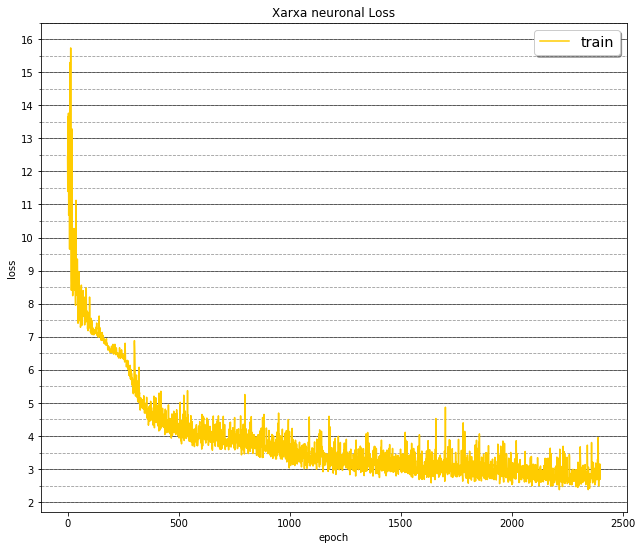

In [64]:
fig, ax = plt.subplots()
fig.set_size_inches(10.5, 9)
plt.plot(history2.history['loss'],color = '#ffcc00')
plt.title('Xarxa neuronal Loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['train', 'test'], loc='upper right', shadow=True, fontsize='x-large')

plt.grid(axis='y', alpha=0.75, color='black')
ax.set_yticks(np.arange(2, 17, 1))
ax.set_yticks(np.arange(2, 17, 0.5), minor=True)
ax.yaxis.grid(True, linestyle='-', which='major', color='black',
               alpha=0.6)
ax.yaxis.grid(True, linestyle='--', which='minor', color='black',
               alpha=0.4)
plt.show()

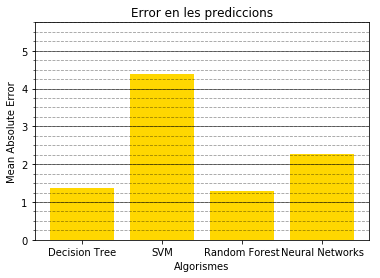

<Figure size 432x288 with 0 Axes>

In [37]:
maeAlgs={"Decision Tree":metrics.mean_absolute_error(y_test, y_predDT), 
             "SVM":metrics.mean_absolute_error(y_test, y_predSVM), 
            "Random Forest":metrics.mean_absolute_error(y_test, y_predRT), 
            "Neural Networks":metrics.mean_absolute_error(y_test, y_predNN2)}

fig, ax = plt.subplots()
plt.bar(range(len(maeAlgs)), list(maeAlgs.values()), align='center',color='gold')
plt.xticks(range(len(maeAlgs)), list(maeAlgs.keys()))

plt.grid(axis='y', alpha=0.75, color='black')
ax.set_yticks(np.arange(0, 6, 1))
ax.set_yticks(np.arange(0, 6, 0.25), minor=True)
ax.yaxis.grid(True, linestyle='-', which='major', color='black',
               alpha=0.6)
ax.yaxis.grid(True, linestyle='--', which='minor', color='black',
               alpha=0.4)

plt.xlabel("Algorismes")
plt.ylabel("Mean Absolute Error")
plt.title("Error en les prediccions")
plt.show()
plt.savefig('comparacioMetricsAlgs.png')

In [38]:
tempsReals = []
tempsRF = []
tempsSVM = []
tempsDT = []
tempsNN = []
i=1
for row in y_test:
    if (i < 20):
        tempsReals.append(row)
    i += 1
i=1
for row in y_predRT:
    if (i < 20):
        tempsRF.append(row)
    i += 1
i=1
for row in y_predSVM:
    if (i < 20):
        tempsSVM.append(row)
    i += 1
i=1
for row in y_predDT:
    if (i < 20):
        tempsDT.append(row)
    i += 1
i=1
for row in y_predNN2:
    if (i < 20):
        tempsNN.append(row)
        
    i += 1

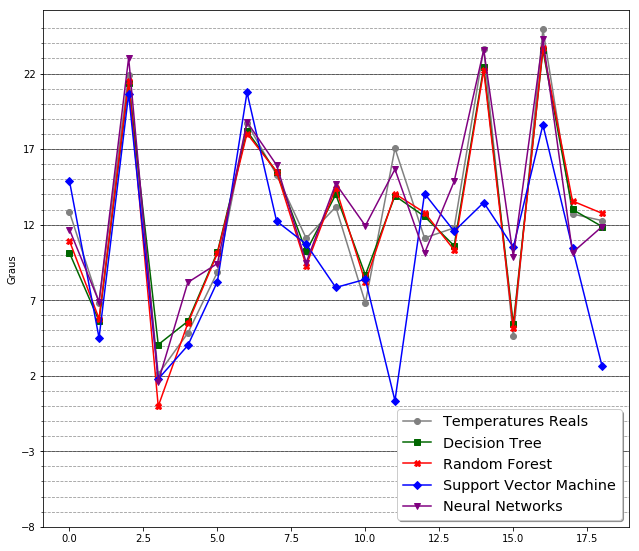

In [53]:
fig, ax = plt.subplots()
fig.set_size_inches(10.5, 9.5)

plt.plot(tempsReals,marker='o', color = 'grey',label = 'Temperatures Reals')
plt.plot(tempsDT,marker='s', color = '#006600', label = 'Decision Tree')
plt.plot(tempsRF,marker='X', color = 'red', label = 'Random Forest')
plt.plot(tempsSVM,marker='D', color = 'blue', label = 'Support Vector Machine')
plt.plot(tempsNN,marker='v', color = 'purple', label = 'Neural Networks')

plt.grid(axis='y', alpha=0.75)
legend = ax.legend(loc='lower right', shadow=True, fontsize='x-large')
plt.ylabel('Graus')
ax.set_yticks(np.arange(-8, 26, 5))
ax.set_yticks(np.arange(-8, 26, 1), minor=True)
ax.yaxis.grid(True, linestyle='-', which='major', color='black',
               alpha=0.6)
ax.yaxis.grid(True, linestyle='--', which='minor', color='black',
               alpha=0.4)

plt.show()
#plt.savefig('comparacioAlgs.png')

C:\Users\Miquel\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


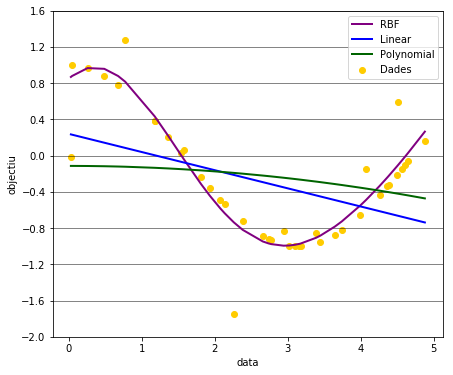

In [20]:
# Generate sample data
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.cos(X).ravel()

# #############################################################################
# Add noise to targets
y[::5] += 3 * (0.5 - np.random.rand(8))

#plot diferents kernels SVM
svr_rbf = svm.SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_lin = svm.SVR(kernel='linear', C=1e3)
svr_poly = svm.SVR(kernel='poly', C=1e3, degree=2)
y_rbf = svr_rbf.fit(X, y).predict(X)
y_lin = svr_lin.fit(X, y).predict(X)
y_poly = svr_poly.fit(X, y).predict(X)

# #############################################################################
# Look at the results
lw = 2
fig, ax = plt.subplots()
fig.set_size_inches(7, 6)
plt.scatter(X, y, color='#ffcc00', label='Dades')
plt.plot(X, y_rbf, color='purple', lw=lw, label='RBF')
plt.plot(X, y_lin, color='blue', lw=lw, label='Linear')
plt.plot(X, y_poly, color='darkgreen', lw=lw, label='Polynomial')
plt.xlabel('data')
plt.ylabel('objectiu')

ax.set_yticks(np.arange(-2, 2, 0.4))
ax.yaxis.grid(True, linestyle='-', which='major', color='black',
               alpha=0.6)
plt.legend()
plt.show()